# Super Gaussian Wake Deficit Model

This notebook reproduces the results of the paper describing the super gaussian wake model:
    
Blondel and Cathelain: _An alternative form of the super-Gaussian wind turbine wake model_, Wind Energ. Sci., 5, 1225–1236, (2020), https://doi.org/10.5194/wes-5-1225-2020.

In [1]:
 # Install PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

### Loading objects

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from py_wake.examples.data.hornsrev1 import Hornsrev1Site, V80
windTurbines = V80()
site = Hornsrev1Site()

# general variables used for calculations
wt_x, wt_y = [0], [0]
U_inf = 10
D = windTurbines.diameter()
h = windTurbines.hub_height()
y = np.linspace(-1*D, 1*D, 120)

### Defining wind farm model

In this example we use the class `Blondel_Cathelain_2020` for the wind farm model as it corresponds to the calibrated parameters shown in the reference paper. As default, the wakes are added linearly following Shapiro (2019) https://www.mdpi.com/1996-1073/12/15/2956 and there is no turbulence model. However the Crespo Hernandez is recommended and used to account for the turbulence intensity within the velocity deficit calculation.

In [5]:
from py_wake.literature.gaussian_models import Blondel_Cathelain_2020
from py_wake.turbulence_models import CrespoHernandez

wfm = Blondel_Cathelain_2020(site, windTurbines, turbulenceModel=CrespoHernandez())

The cases to be replicated correspond to Figures 3 and 4 for the normalized velocity deficit at three downstream distances from the turbine's rotor, for cases of low and high turbulence. The cases chosen are:

- CT = 0.43, TI = 5%
- CT = 0.73, TI = 12%

In [6]:
# getting points extracted from paper

def get_data(path_data):
    data = np.genfromtxt(path_data)

    points_x = data[:,0]
    points_y = data[:,1]
    
    return points_x, points_y

### Low turbulence case

Specifying path for data files and getting points.

In [7]:
# x/D = 2
path_2xD_l = r"data/Super_Gaussian/2_x_D_lowti.dat"

xd_2_points_l, yd_2_points_l = get_data(path_2xD_l)

# x/D = 4
path_4xD_l = r"data/Super_Gaussian/4_x_D_lowti.dat"

xd_4_points_l, yd_4_points_l = get_data(path_4xD_l)

# x/D = 8
path_8xD_l = r"data/Super_Gaussian/8_x_D_lowti.dat"

xd_8_points_l, yd_8_points_l = get_data(path_8xD_l)

x_points_l = [xd_2_points_l, xd_4_points_l, xd_8_points_l]
y_points_l = [yd_2_points_l, yd_4_points_l, yd_4_points_l]

In [8]:
# selecting corresponding ti and CT

ti = 0.05

windTurbines.ct = lambda ws, **kwargs: 0.43

simres_l = wfm(wt_x, wt_y, wd=270, ws=U_inf, TI=ti)

Text(0.5, 1.2, 'Figure 3')

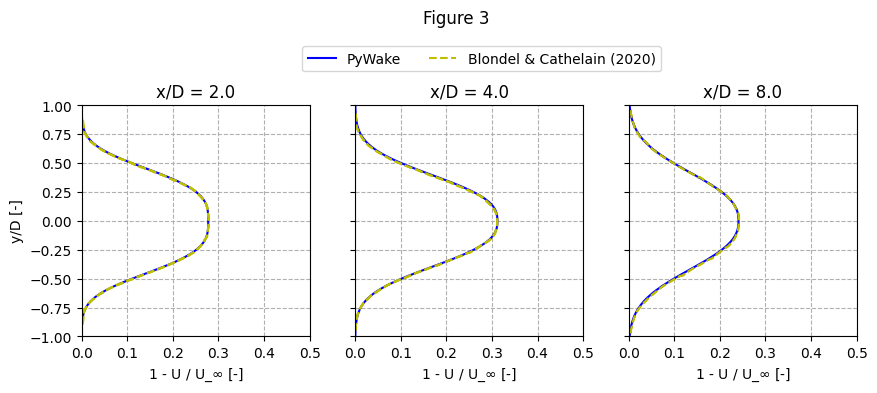

In [9]:
xD = [2*D, 4*D, 8*D]

lines = []
fig, ax = plt.subplots(1,3, sharey=True, figsize=(10,3))
for i, x_D in enumerate(xD):
    U = simres_l.flow_box(x=x_D, y=y, h=h).WS_eff.values.flatten()
    l, = ax[i].plot(1 - U/U_inf, y/D, 'b-')
    l1, = ax[0].plot(xd_2_points_l, yd_2_points_l, 'y--')
    l2, = ax[1].plot(xd_4_points_l, yd_4_points_l, 'y--')
    l3, = ax[2].plot(xd_8_points_l, yd_8_points_l, 'y--')
    lines.append(l)
    
    ax[i].set_ylim(-1, 1)
    ax[i].set_xlim(0, 0.5)
    ax[i].set_title(f'x/D = {x_D/D}')
    ax[0].set_ylabel('y/D [-]')
    ax[i].set_xlabel('1 - U / U_$\infty$ [-]')
    ax[i].grid(linestyle='--')

fig.legend((lines[0], l1), ('PyWake', 'Blondel & Cathelain (2020)'), ncol=2, loc='upper center', bbox_to_anchor=(0, 0, 1.05, 1.1), numpoints=1, scatterpoints=1)
fig.suptitle('Figure 3', y=1.2)

### High turbulence case

Specifying path for data files and getting points.

In [10]:
# x/D = 2
path_2xD_h = r"data/Super_Gaussian/2_x_D_highti.dat"

xd_2_points_h, yd_2_points_h = get_data(path_2xD_h)

# x/D = 4
path_4xD_h = r"data/Super_Gaussian/4_x_D_highti.dat"

xd_4_points_h, yd_4_points_h = get_data(path_4xD_h)

# x/D = 8
path_8xD_h = r"data/Super_Gaussian/8_x_D_highti.dat"

xd_8_points_h, yd_8_points_h = get_data(path_8xD_h)

x_points_h = [xd_2_points_h, xd_4_points_h, xd_8_points_h]
y_points_h = [yd_2_points_h, yd_4_points_h, yd_4_points_h]

In [11]:
# selecting corresponding ti and CT

ti = 0.12

windTurbines.ct = lambda ws, **kwargs: 0.73

simres_h = wfm(wt_x, wt_y, wd=270, ws=U_inf, TI=ti)

Text(0.5, 1.2, 'Figure 4')

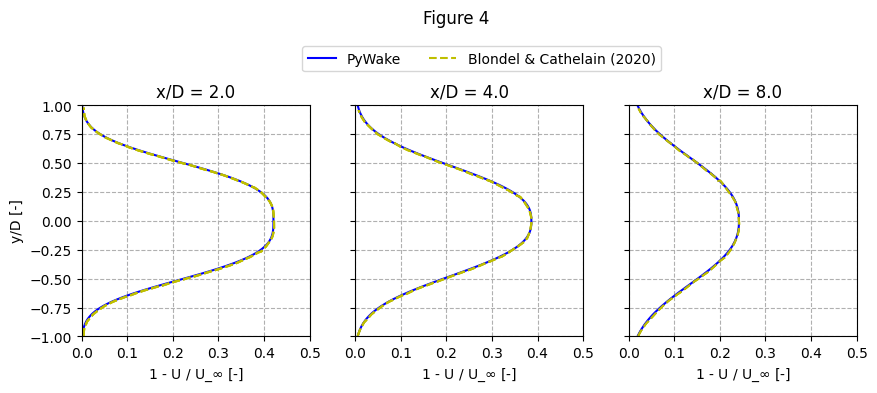

In [12]:
xD = [2*D, 4*D, 8*D]

lines = []
fig, ax = plt.subplots(1,3, sharey=True,figsize=(10,3))
for i, x_D in enumerate(xD):
    U = simres_h.flow_box(x=x_D, y=y, h=h).WS_eff.values.flatten()
    l, = ax[i].plot(1 - U/U_inf, y/D, 'b-')
    l1, = ax[0].plot(xd_2_points_h, yd_2_points_h, 'y--')
    l2, = ax[1].plot(xd_4_points_h, yd_4_points_h, 'y--')
    l3, = ax[2].plot(xd_8_points_h, yd_8_points_h, 'y--')
    lines.append(l)
    
    ax[i].set_ylim(-1, 1)
    ax[i].set_xlim(0, 0.5)
    ax[i].set_title(f'x/D = {x_D/D}')
    ax[0].set_ylabel('y/D [-]')
    ax[i].set_xlabel('1 - U / U_$\infty$ [-]')
    ax[i].grid(linestyle='--')

fig.legend((lines[0], l1), ('PyWake', 'Blondel & Cathelain (2020)'), ncol=2, loc='upper center', bbox_to_anchor=(0, 0, 1.05, 1.1), numpoints=1, scatterpoints=1)
fig.suptitle('Figure 4', y=1.2)

### Comparison with measurements

The implementation of the model is now compared to data from experimental campaigns as well as the analytical model derived by the authors. A set of data containing lidar measurements is used for the comparison, at the wake behind a full scale wind turbine. Two cases were recorded: stable and nearly neutral atmosphere; however for the purpose of this example only a high turbulence case in the nearly neutral atmosphere will be considered, as it also contains LES data from a SOFWA (Simulator fOrWind Farm Applications; Churchfield et al., 2012) simulation.

The case to be studied corresponds to:

**High turbulence example**

- CT: 0.75, TI: 10.7%

Specifying path for data files and getting points.

In [13]:
# high turbulence case - measurements

# x/D = 2
path_2xD_mh = r"data/Super_Gaussian/2_x_D_meas_highti.dat"

xd_2_points_mh, yd_2_points_mh = get_data(path_2xD_mh)

# x/D = 5
path_5xD_mh = r"data/Super_Gaussian/5_x_D_meas_highti.dat"

xd_5_points_mh, yd_5_points_mh = get_data(path_5xD_mh)

# high turbulence case - LES

# x/D = 2
path_2xD_les = r"data/Super_Gaussian/2_x_D_LES_highti.dat"

xd_2_points_les, yd_2_points_les = get_data(path_2xD_les)

# x/D = 5
path_5xD_les = r"data/Super_Gaussian/5_x_D_LES_highti.dat"

xd_5_points_les, yd_5_points_les = get_data(path_5xD_les)

# high turbulence case - super gaussian analytical

path_2xD_sp = r"data/Super_Gaussian/2_x_D_sp_highti.dat"

xd_2_points_sp, yd_2_points_sp = get_data(path_2xD_sp)

path_5xD_sp = r"data/Super_Gaussian/5_x_D_sp_highti.dat"

xd_5_points_sp, yd_5_points_sp = get_data(path_5xD_sp)

In [14]:
# selecting corresponding ti and CT

ti = 0.107

windTurbines.ct = lambda ws, **kwargs: 0.75

simres_mh = wfm(wt_x, wt_y, wd=270, ws=U_inf, TI=ti)

Text(0.5, 1, 'Figure 5')

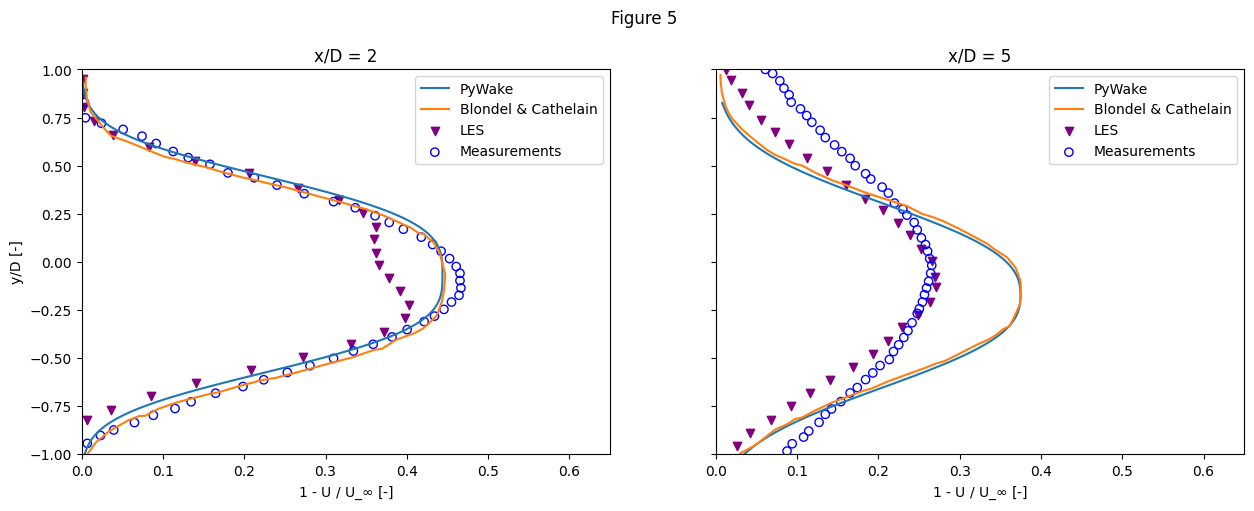

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))

offset = -0.06478737727060202

U_2xd = simres_mh.flow_box(x=2*D, y=y, h=h).WS_eff.values.flatten()

ax1.plot(1 - U_2xd/U_inf, y/D + offset, label='PyWake')
ax1.plot(xd_2_points_sp, yd_2_points_sp, label='Blondel & Cathelain')
ax1.scatter(xd_2_points_les, yd_2_points_les, marker='v', facecolor='purple', label='LES')
ax1.scatter(xd_2_points_mh, yd_2_points_mh, marker='o', facecolor='None', edgecolor= 'blue',label='Measurements')
ax1.set_title('x/D = 2')
ax1.set_ylim([-1,1])
ax1.set_xlim([0,0.65])
ax1.set_ylabel('y/D [-]')
ax1.set_xlabel('1 - U / U_$\infty$ [-]')
ax1.legend(loc='upper right')

offset = -0.1738105526986733

U_5xd = simres_mh.flow_box(x=5*D, y=y, h=h).WS_eff.values.flatten()

ax2.plot(1 - U_5xd/U_inf, y/D + offset, label='PyWake')
ax2.plot(xd_5_points_sp, yd_5_points_sp, label='Blondel & Cathelain')
ax2.scatter(xd_5_points_les, yd_5_points_les, marker='v', facecolor='purple', label='LES')
ax2.scatter(xd_5_points_mh, yd_5_points_mh, marker='o', facecolor='None', edgecolor= 'blue',label='Measurements')     
ax2.set_title('x/D = 5')
ax2.set_ylim([-1,1])
ax2.set_xlim([0,0.65])
ax2.set_xlabel('1 - U / U_$\infty$ [-]')
ax2.legend(loc='upper right')

fig.suptitle('Figure 5', y=1)

The model seems to capture the wake profile pretty well in the near wake, however it tends to overestimate the maximum velocity deficit at the far wake.